In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import sklearn
import string
from sklearn import preprocessing

In [2]:
movies = pd.read_csv('movies_clean.csv')
movies.head()
movies.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
tfid = TfidfVectorizer(min_df=2,  max_features=None, 
            strip_accents='unicode', analyzer='word',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
movies['Keywords'] = movies['Keywords'].fillna('')
matriz = tfid.fit_transform(movies.Keywords)

In [4]:
coseno = sigmoid_kernel(matriz,matriz)

In [5]:
indices = pd.Series(movies.index, index =  movies.Title).drop_duplicates()

In [6]:
def recomendacion (titulo, coseno = coseno,indices=indices):
    try:
        idx = indices[titulo]
        score =list(enumerate(coseno[idx]))
        score = sorted(score, key = lambda x: x[1], reverse = True)
        score = score[1:11]
        video = [i[0] for i in score]
        return print(movies['Title'].iloc[video])
    except:
        print('I don´t recognize that title')

In [7]:
vote = movies.Votes
rate = movies.Rate
c = movies.Rate.mean()
m = movies.Votes.quantile(0.7)

In [8]:
movies['W_rate'] = (vote/(vote+m) * rate) + (m/(m+vote) * c)

In [9]:
movies.sort_values('W_rate', ascending=False, inplace=True)
movies = movies.reset_index(drop=True)


Text(0, 0.5, 'Movie')

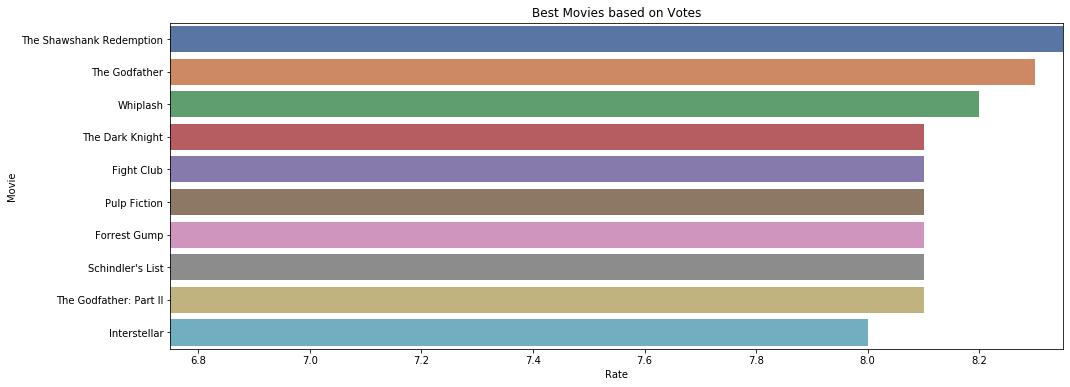

In [10]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x=movies['Rate'].head(10), y=movies['Title'].head(10), data=movies, palette='deep')
plt.xlim(6.75, 8.35)
plt.title('Best Movies based on Votes')
plt.xlabel('Rate')
plt.ylabel('Movie')


In [11]:
scaler = preprocessing.MinMaxScaler()
moviesmix = scaler.fit_transform(movies[['W_rate', 'Popularity']])
normal = pd.DataFrame(moviesmix, columns=['W_rate', 'Popularity'])

In [12]:
movies[['Norm_W_rate', 'Norm_popularity']] = normal

In [13]:
movies['score'] = movies['Norm_W_rate'] * 0.5 + movies['Norm_popularity'] * 0.5

In [14]:
scored = movies.sort_values(['score'], ascending=False)

In [15]:
scored.head()

,Popularity,Title,Actors,Director,Keywords,Overview,Duration,Genre,Votes,Rate,Year,W_rate,Norm_W_rate,Norm_popularity,score
9,24.949134,Interstellar,Matthew McConaughey Jessica Chastain Anne Hath...,Christopher Nolan,saving the world artificial intelligence fathe...,Interstellar chronicles the adventures of a gr...,169,Adventure Drama Science Fiction,6498,8.0,2014,7.968099,0.912378,0.756360,0.834369
1140,32.985763,Jurassic World,Chris Pratt Bryce Dallas Howard Irrfan Khan Vi...,Colin Trevorrow,monster dna tyrannosaurus rex velociraptor island,Twenty-two years after the events of Jurassic ...,124,Action Adventure Science Fiction Thriller,5562,6.5,2015,6.490362,0.579389,1.000000,0.789694
311,28.419936,Mad Max: Fury Road,Tom Hardy Charlize Theron Hugh Keays Byrne Nic...,George Miller,future chase post apocalyptic dystopia australia,An apocalyptic story set in the furthest reach...,120,Action Adventure Science Fiction Thriller,6185,7.1,2015,7.081395,0.712571,0.861582,0.787076
21,14.311205,Guardians of the Galaxy,Chris Pratt Zoe Saldana Dave Bautista Vin Dies...,James Gunn,marvel comic spaceship space scene during end ...,"Light years from Earth, 26 years after being a...",121,Action Science Fiction Adventure,5612,7.9,2014,7.864974,0.889140,0.433859,0.661500
22,12.037933,Star Wars,Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,121,Adventure Action Science Fiction,4428,7.9,1977,7.855823,0.887078,0.364942,0.626010


Text(0, 0.5, 'Title')

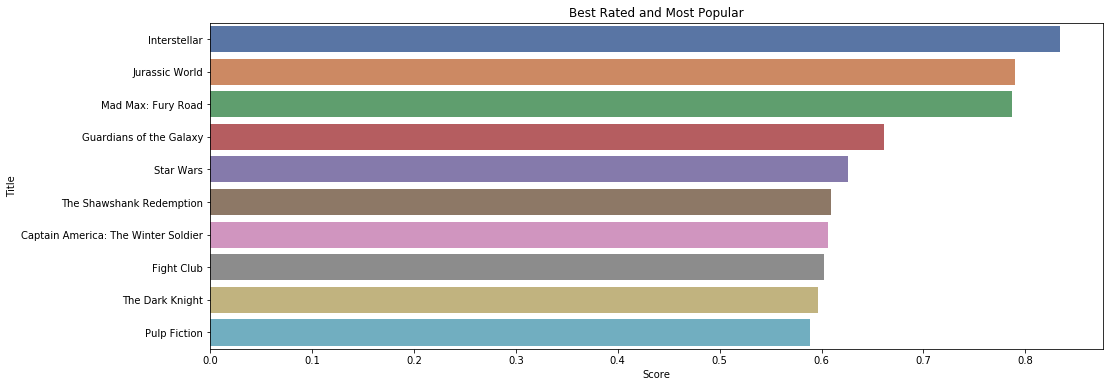

In [16]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x=scored['score'].head(10), y=scored['Title'].head(10), data=scored, palette='deep')
plt.title('Best Rated and Most Popular')
plt.xlabel('Score')
plt.ylabel('Title')


In [17]:
movies.corr()

,Popularity,Duration,Votes,Rate,Year,W_rate,Norm_W_rate,Norm_popularity,score
Popularity,1.000000,0.139033,0.800828,0.209511,0.089801,0.409327,0.409327,1.000000,0.634585
Duration,0.139033,1.000000,0.163278,0.156835,-0.117204,0.177072,0.177072,0.139033,0.190014
Votes,0.800828,0.163278,1.000000,0.253823,0.107948,0.494983,0.494983,0.800828,0.649808
Rate,0.209511,0.156835,0.253823,1.000000,-0.117632,0.777415,0.777415,0.209511,0.718832
Year,0.089801,-0.117204,0.107948,-0.117632,1.000000,-0.089427,-0.089427,0.089801,-0.049901
W_rate,0.409327,0.177072,0.494983,0.777415,-0.089427,1.000000,1.000000,0.409327,0.964895
Norm_W_rate,0.409327,0.177072,0.494983,0.777415,-0.089427,1.000000,1.000000,0.409327,0.964895
Norm_popularity,1.000000,0.139033,0.800828,0.209511,0.089801,0.409327,0.409327,1.000000,0.634585
score,0.634585,0.190014,0.649808,0.718832,-0.049901,0.964895,0.964895,0.634585,1.000000


In [19]:
recomendacion('Jurassic Park')

8092                   Staten Island Summer
8818                              7 Minutes
2511                       The Sand Pebbles
7870                              DÃ¨moni 2
9163    Behind Enemy Lines II: Axis of Evil
0                  The Shawshank Redemption
3147                          Hang 'em High
1513                    Conan the Barbarian
202                                 Birdman
5137                      A Christmas Carol
Name: Title, dtype: object
